In [2]:
import pandas as pd
import numpy as np

In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
df_list = [train, test]

In [4]:
for df in df_list:
    df['Age_Group'] = df['Age']//10
    df['CreditScore_Group'] = df['CreditScore']//100
    df['Balance'] = df['Balance'].apply(lambda x: 0.1 if x == 0 else x)
    df['Balance_log'] = np.floor(np.log10(df['Balance']))
    #df['Balance_log'] = np.log10(df['Balance'])
    df['EstimatedSalary'] = df['Balance'].apply(lambda x: 0.1 if x == 0 else x)
    df['EstimatedSalary_log'] = np.floor(np.log10(df['EstimatedSalary']))
    #df['EstimatedSalary_log'] = np.log10(df['EstimatedSalary'])

In [7]:
for df in df_list:
    df['Balance_log'] = df['Balance_log'].apply(lambda x: -1 if x == 1 else x)
    df['Balance_log'] = df['Balance_log'].apply(lambda x: 4 if x == 3 else x)

In [10]:
for df in df_list:
    df['EstimatedSalary_log'] = df['EstimatedSalary_log'].apply(lambda x: -1 if x == 1 else x)
    df['EstimatedSalary_log'] = df['EstimatedSalary_log'].apply(lambda x: 4 if x == 3 else x)

In [11]:
reg_used = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts',
            'HasCrCard',
       'IsActiveMember', 'CreditScore_Group','Balance_log', 'EstimatedSalary_log']
dum = ['Geography', 'Gender', 'NumOfProducts', 'CreditScore_Group',
       'Balance_log', 'EstimatedSalary_log'
      ]

In [12]:
X_train = train[reg_used]
X_test = test[reg_used]

In [13]:
X_train_dum = pd.get_dummies(X_train, columns = dum)
X_test_dum = pd.get_dummies(X_test, columns = dum)

In [14]:
X_train_dum = X_train_dum.drop(columns = 'Gender_Male')
X_test_dum = X_test_dum.drop(columns = 'Gender_Male')

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_dum)
X_test_std = scaler.fit_transform(X_test_dum)

In [16]:
y = train['Exited']

In [17]:
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_std, y, stratify=y, test_size=0.25)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_split,y_train_split)

LogisticRegression(random_state=0)

In [23]:
y_train_split_pred = clf.predict(X_train_split)
y_test_split_pred = clf.predict(X_test_split)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train_split, y_train_split_pred)

0.8572086447182388

In [25]:
accuracy_score(y_test_split, y_test_split_pred)

0.8553527715165176

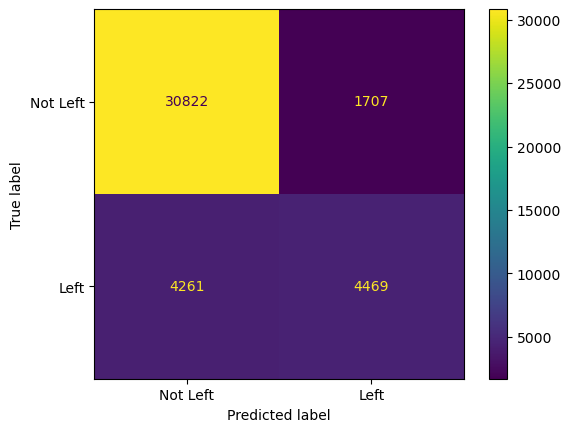

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_split, y_test_split_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Left', 'Left'])
disp.plot()

In [29]:
tn, fp, fn, tp = cm.ravel()

In [30]:
print("recall", tp/(fn+tp))
print("precision", tp/(fp+tp))

recall 0.5119129438717067
precision 0.7236075129533679
